In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [64]:
data = pd.read_csv('data.csv')

x = data.drop(columns = ['Unnamed: 0','y'])
y = data['y']

x = x.to_numpy()
y = y.to_numpy()

print('Instancias:', np.shape(x)[0])
print('Dimensiones:', np.shape(x)[1])
print('Instancias/Dimensiones:', int(np.shape(x)[0]/np.shape(x)[1]))
print('Clases: ', np.unique(y, return_counts=True)[0], 'Instancias por clase:', np.unique(y, return_counts=True)[1])

Instancias: 11500
Dimensiones: 178
Instancias/Dimensiones: 64
Clases:  [1 2 3 4 5] Instancias por clase: [2300 2300 2300 2300 2300]


In [65]:
scaler = sklearn.preprocessing.StandardScaler()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.5)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
C = np.logspace(-7,5,9)
f1_l1 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l1', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l1.append(f1_score)

f1_l2 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l2', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l2.append(f1_score)

Text(0.5, 1.0, 'Penalty = l2')

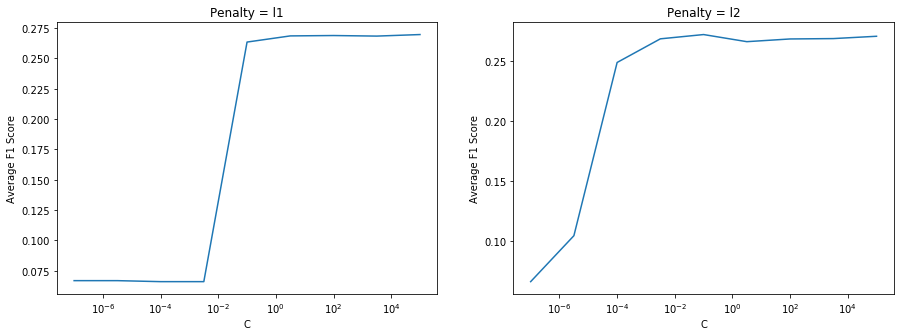

In [67]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.semilogx(C,f1_l1)
plt.xlabel('C')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l1')

plt.subplot(122)
plt.semilogx(C,f1_l2)
plt.xlabel('C')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l2')

In [77]:
print('Regresión Logística:')
print('\t Average F1 Score Máximo (Penality = l1): {:.3f}'.format(np.max(f1_l1)), ', C = {}'.format(C[np.argmax(f1_l1)]))
print('\t Average F1 Score Máximo (Penality = l2): {:.3f}'.format(np.max(f1_l2)), ', C = {}'.format(C[np.argmax(f1_l2)]))

Regresión Logística:
	 Average F1 Score Máximo (Penality = l1): 0.269 , C = 100000.0
	 Average F1 Score Máximo (Penality = l2): 0.272 , C = 0.1


In [69]:
neurons = [1,2,3,4,5]
f1_1neu = []

for element in neurons:
    mlp = sklearn.neural_network.MLPClassifier(activation = 'logistic', hidden_layer_sizes = element, max_iter = 1000)
    mlp.fit(x_train,y_train)
    f1_1neu.append(sklearn.metrics.f1_score(y_test,mlp.predict(x_test),average = 'macro'))

neurons_1 = [1,2,3]
neurons_2 = [2,3,4,5]
f1_2neu = []

for element_1 in neurons_1:
    for element_2 in neurons_2:
        mlp = sklearn.neural_network.MLPClassifier(activation = 'logistic', 
                                                   hidden_layer_sizes = (element_1,element_2), max_iter = 1000)
        mlp.fit(x_train,y_train)
        f1_2neu.append(sklearn.metrics.f1_score(y_test,mlp.predict(x_test),average = 'macro'))

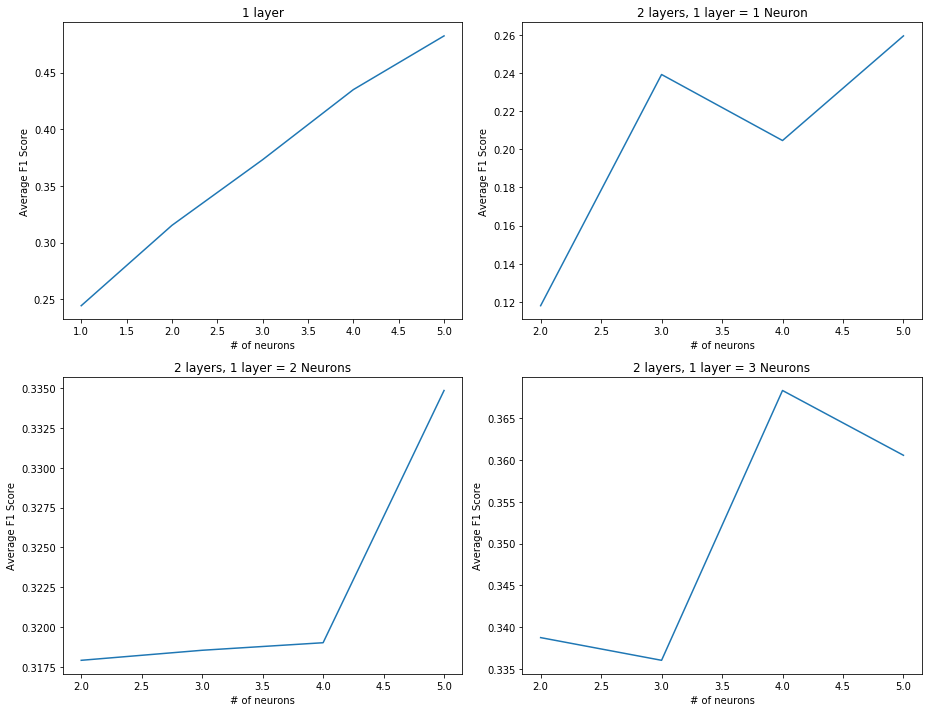

In [73]:
plt.figure(figsize = (13,10))
plt.subplot(221)
plt.plot(neurons,f1_1neu)
plt.xlabel('# of neurons')
plt.ylabel('Average F1 Score')
plt.title('1 layer')

plt.subplot(222)
plt.plot(neurons_2,f1_2neu[0:4])
plt.xlabel('# of neurons')
plt.ylabel('Average F1 Score')
plt.title('2 layers, 1 layer = 1 Neuron')

plt.subplot(223)
plt.plot(neurons_2,f1_2neu[4:8])
plt.xlabel('# of neurons')
plt.ylabel('Average F1 Score')
plt.title('2 layers, 1 layer = 2 Neurons')

plt.subplot(224)
plt.plot(neurons_2,f1_2neu[8:])
plt.xlabel('# of neurons')
plt.ylabel('Average F1 Score')
plt.title('2 layers, 1 layer = 3 Neurons')

plt.tight_layout()

In [80]:
print('Perceptrón:')
print('\t Average F1 Score Máximo (1 Layer): {:.3f}'.format(np.max(f1_1neu)),
      ', # de Neuronas: {}'.format(neurons[np.argmax(f1_1neu)]))
print('\t Average F1 Score Máximo (2 Layers): {:.3f}'.format(np.max(f1_2neu[0:4])),
      ', # de Neuronas: ({},{})'.format(1, neurons_2[np.argmax(f1_2neu[0:4])]))
print('\t Average F1 Score Máximo (2 Layers): {:.3f}'.format(np.max(f1_2neu[4:8])),
      ', # de Neuronas: ({},{})'.format(2, neurons_2[np.argmax(f1_2neu[4:8])]))
print('\t Average F1 Score Máximo (2 Layers): {:.3f}'.format(np.max(f1_2neu[8:12])),
      ', # de Neuronas: ({},{})'.format(3, neurons_2[np.argmax(f1_2neu[8:12])]))

Perceptrón:
	 Average F1 Score Máximo (1 Layer): 0.482 , # de Neuronas: 5
	 Average F1 Score Máximo (2 Layers): 0.259 , # de Neuronas: (1,5)
	 Average F1 Score Máximo (2 Layers): 0.335 , # de Neuronas: (2,5)
	 Average F1 Score Máximo (2 Layers): 0.368 , # de Neuronas: (3,4)


Como se puede ver, con regresión logística el máximo F1 score que se consigue es de 0.272, el cual es bastante bajo. Ahora bien, con los resultados encontrados para las redes, se encuentró que el máximo F1 score el de 0.482 para el modelo con solo una capa y 5 neuronas. Si bien este F1 score es todavia bajo, se ve una clara mejora haciendo uso del perceptrón a comparación con la regresión logística. 

Ahora bien, considerando las diferentes arquitecturas de las redes siendo usadas, se ve que el mejor resultado se encuentra con la red más simple. Por esta razón, puede ser que las arquitecturas de dos capas están cayendo en el territorio de 'overfitting'. Aún asi, se ve que el F1 score aumenta a medida que las neuronas de la primera capa también lo hacen. Pero, ninguna de las arquitecturas con 2 capas se acerca al resultado encontrado con la arquitectura de una capa. Es por esta razón que a veces lo más simple, es mejor.